Epoch [1/10], Loss: 1.3918838144022192
Epoch [2/10], Loss: 1.3872553702801635
Epoch [3/10], Loss: 1.3866991848595398
Epoch [4/10], Loss: 1.3865206679381894
Epoch [5/10], Loss: 1.3864427868929285
Epoch [6/10], Loss: 1.3863983107151958
Epoch [7/10], Loss: 1.3863709441012582
Epoch [8/10], Loss: 1.3863508963989
Epoch [9/10], Loss: 1.386344543621365
Epoch [10/10], Loss: 1.386334671475793
Similarity between words: 0.008740002289414406


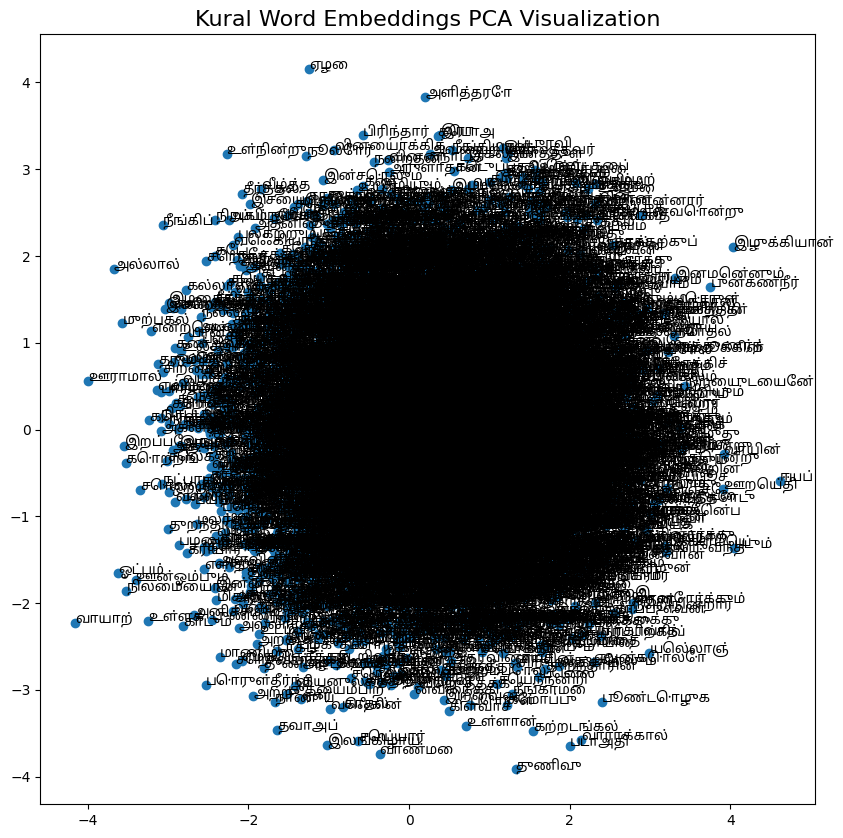

In [5]:
import json
from sklearn.decomposition import PCA
from train_model import process
import matplotlib.pyplot as plt
from kural_token import get_token
from matplotlib import font_manager

# Get the words (vocabulary) and the corresponding model
words = list(get_token().keys())
kuralModel = process("KuralNNModel")

# Step 1: Access the learned word embeddings from the embedding layer
word_embeddings = kuralModel.in_embeddings.weight.data.cpu().numpy()

# Step 2: Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(word_embeddings)

# Step 3: Set Tamil-compatible font
# Change this to a Tamil font available on your system (e.g., Noto Sans Tamil, Latha)
font_path = 'font.ttf'  # Change to your font path
prop = font_manager.FontProperties(fname=font_path)

# Step 4: Create a scatter plot of the words in the 2D space
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1])

# Step 5: Annotate the words at the corresponding points with Tamil font
data = []
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings_pca[i, 0], reduced_embeddings_pca[i, 1]), fontproperties=prop)
    data.append({"word": word, "x": float(reduced_embeddings_pca[i, 0]), "y": float(reduced_embeddings_pca[i, 1])})

with open("word_embeddings.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

# Show the plot
plt.title("Kural Word Embeddings PCA Visualization", fontsize=16)
plt.show()
